# Introduction 

Based on our datasets (Meteorological datat + building energy consumption), we examined 8 different algorithms and concluded that Artifical Nueral Networks model exhibits the best performance in comparison with other algorithms. 

In this Notebook, the ANN model is developed based on meteorological data of 2016, 2017 and 2018 to predict the building energy consumption. after model developement, we use meteorological data of 2019 till 2023 to predict their energy consumption. 

# Importing required Libraries

In [1]:
# for data analysis and manipulation.
import pandas as pd

# to have access to mathematical and statistical functions.
import numpy as np

# For data visualization
import matplotlib.pyplot as plt

#Missing data visualization module for Python.
import missingno as msno

#Statistical data visualization
import seaborn as sns

#to see correlation between features and how they affect each other
from scipy.stats import spearmanr

#Split arrays or matrices into random train and test subsets.
from sklearn.model_selection import train_test_split

#Coefficient of determination
from sklearn.metrics import r2_score

#MSE
from sklearn.metrics import mean_squared_error

from keras.models import Sequential

from keras.layers import Dense


2024-07-16 14:35:42.309894: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-16 14:35:42.313211: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-16 14:35:42.441652: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-16 14:35:42.915867: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-16 14:35:44.454874: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

# Loading datasets

## Meteorological Dataset

the following dataset is the meteorological dataset after conducting feature selection, containing the most important features of 3 consecuetive years (2016,2017,2018)

In [2]:
meteo2016_2018=pd.read_excel('/mnt/e/Education/M.Sc at UT/Projects/Energy consumption prediction/Iterative model/forGitHub/Datasets/WeatherData2016_2018.xlsx')
meteo2016_2018 = meteo2016_2018.set_index('Time')
meteo2016_2018

meteo2016_2018_Updated= meteo2016_2018.loc[:, ~meteo2016_2018.columns.isin(["TD","RH","DR","FX"])] # ~ sign drops the columns we select
meteo2016_2018_Updated['U'] = 0.01*meteo2016_2018_Updated['U'] #Transfering percentage to fraction
meteo2016_2018_Updated 

/tmp/ipykernel_753/2356268056.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meteo2016_2018_Updated['U'] = 0.01*meteo2016_2018_Updated['U'] #Transfering percentage to fraction


,month,HH,U,Temp,Q,FF,P
Time,,,,,,,
2016-01-01 01:00:00,1,1,0.82,6.6,0,30,10224
2016-01-01 02:00:00,1,2,0.83,7.0,0,40,10228
2016-01-01 03:00:00,1,3,0.91,5.9,0,30,10232
2016-01-01 04:00:00,1,4,0.96,4.2,0,20,10237
2016-01-01 05:00:00,1,5,0.98,4.0,0,20,10240
...,...,...,...,...,...,...,...
2018-12-31 19:00:00,12,19,0.93,8.7,0,30,10341
2018-12-31 20:00:00,12,20,0.92,8.5,0,30,10338
2018-12-31 21:00:00,12,21,0.89,8.2,0,40,10336


### Insights to our dataset

**Overal statistics of our dataset**

In [3]:
meteo2016_2018_Updated.describe()

,month,HH,U,Temp,Q,FF,P
count,26303.000000,26303.000000,26303.000000,26303.000000,26303.000000,26303.000000,26303.000000
mean,6.522108,12.499563,0.779410,11.289267,45.633008,35.962818,10161.313044
std,3.448949,6.922087,0.173184,7.488253,72.777856,20.845551,95.459902
min,1.000000,1.000000,0.130000,-9.700000,0.000000,0.000000,9712.000000
25%,4.000000,6.500000,0.670000,5.700000,0.000000,20.000000,10110.000000
50%,7.000000,12.000000,0.830000,10.800000,2.000000,30.000000,10168.000000
75%,10.000000,18.000000,0.920000,16.700000,67.000000,50.000000,10225.000000
max,12.000000,24.000000,1.000000,36.600000,329.000000,180.000000,10459.000000


**Checking the missing values in our dataset**

In [4]:
meteo2016_2018_Updated.isna().sum()

month    0
HH       0
U        0
Temp     0
Q        0
FF       0
P        0
dtype: int64

there are no missing values in our dataset

<Axes: >

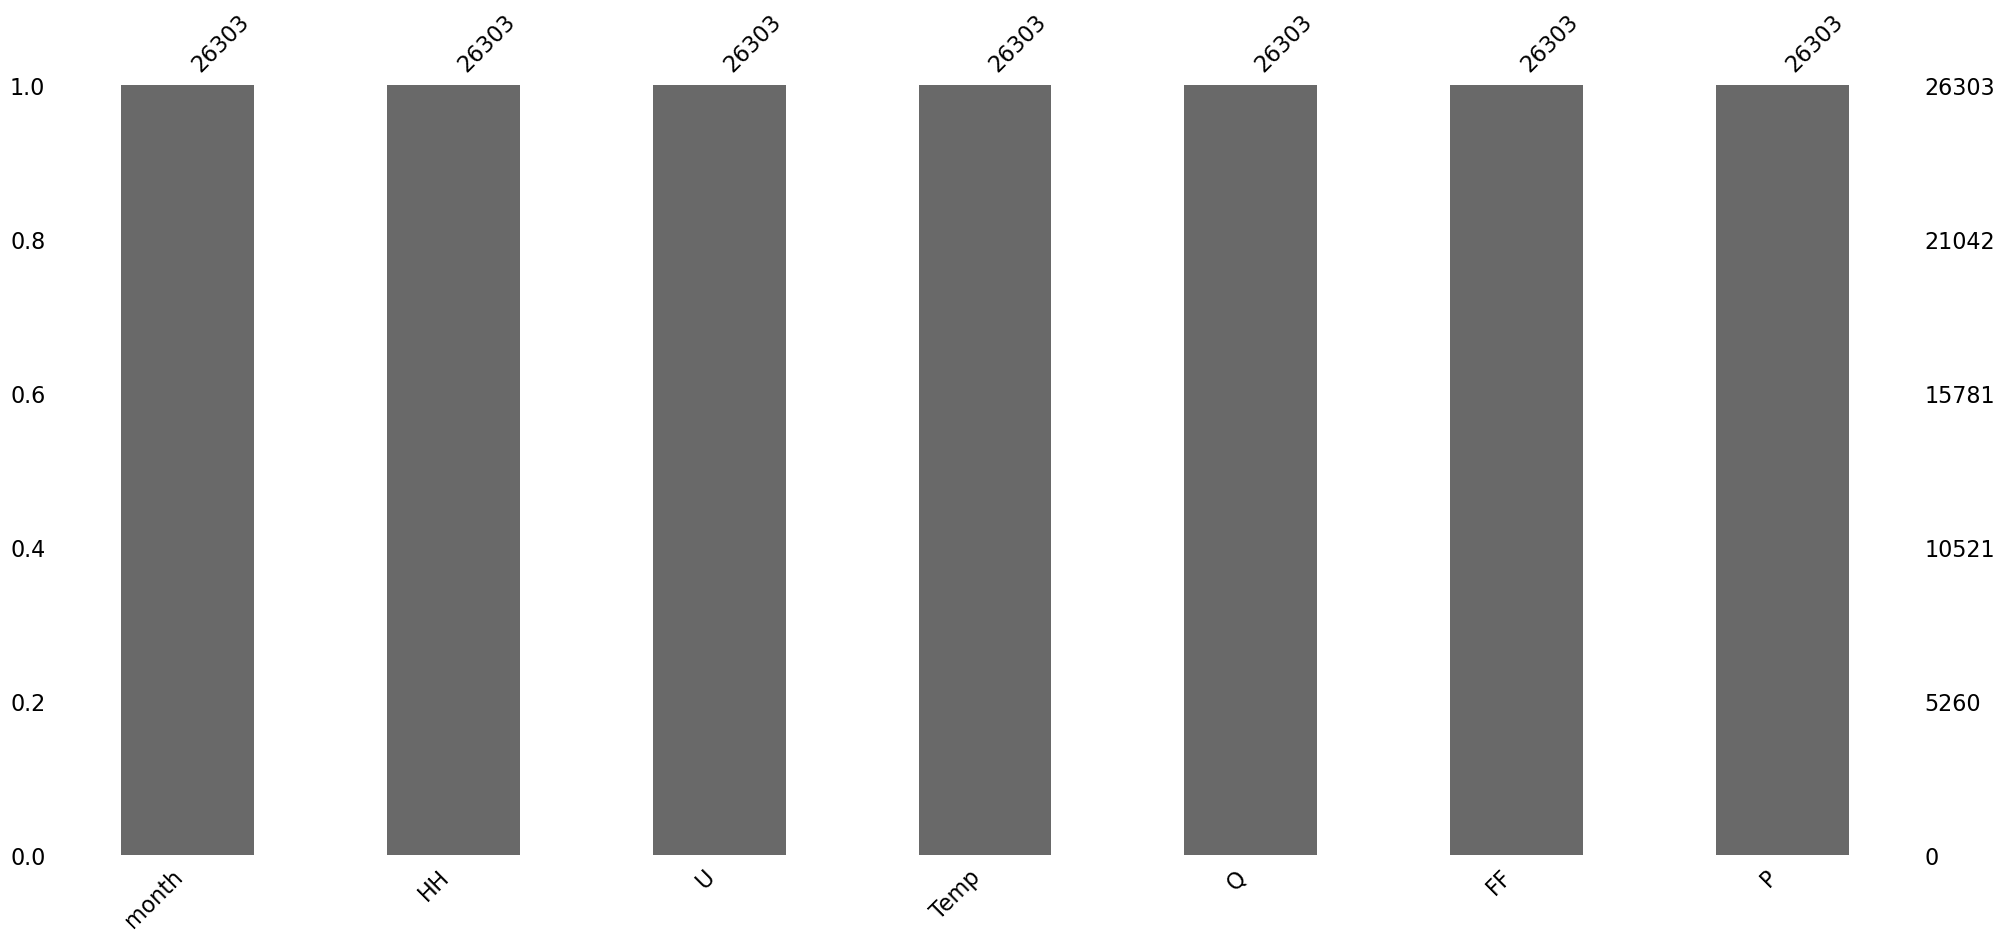

In [5]:
msno.bar(meteo2016_2018_Updated)

The pre-processing steps including feature selection is conducted in another JupyterNotebook. for more information check **bestAlgorithmSearch.ipynb**

## Energy Consumption dataset

the following dataset is the energy consumption of a building with an hourly resolution.

In [6]:
energy2016_2018 = pd.read_excel('/mnt/e/Education/M.Sc at UT/Projects/Energy consumption prediction/Iterative model/forGitHub/Datasets/BuildingEnergyConsumption2016_2018.xlsx')
energy2016_2018 = energy2016_2018.set_index('Time')  # for further processing, we need to set index of each smaple with Time
energy2016_2018

,EnergyCons
Time,
2016-01-01 01:00:00,23.783228
2016-01-01 02:00:00,23.783228
2016-01-01 03:00:00,23.783228
2016-01-01 04:00:00,23.783228
2016-01-01 05:00:00,23.783228
...,...
2018-12-31 19:00:00,18.602723
2018-12-31 20:00:00,18.838200
2018-12-31 21:00:00,18.602723


### Insights to dataset

**Overal statistics of our dataset**

In [7]:
energy2016_2018.describe()

,EnergyCons
count,26303.000000
mean,25.694969
std,6.317738
min,15.541515
25%,20.957498
50%,23.783228
75%,28.728255
max,59.340330


**Checking the missing values in our dataset**

In [8]:
energy2016_2018.isna().sum()

EnergyCons    0
dtype: int64

No missing values in the enrgy consumption of this building either!

<Axes: >

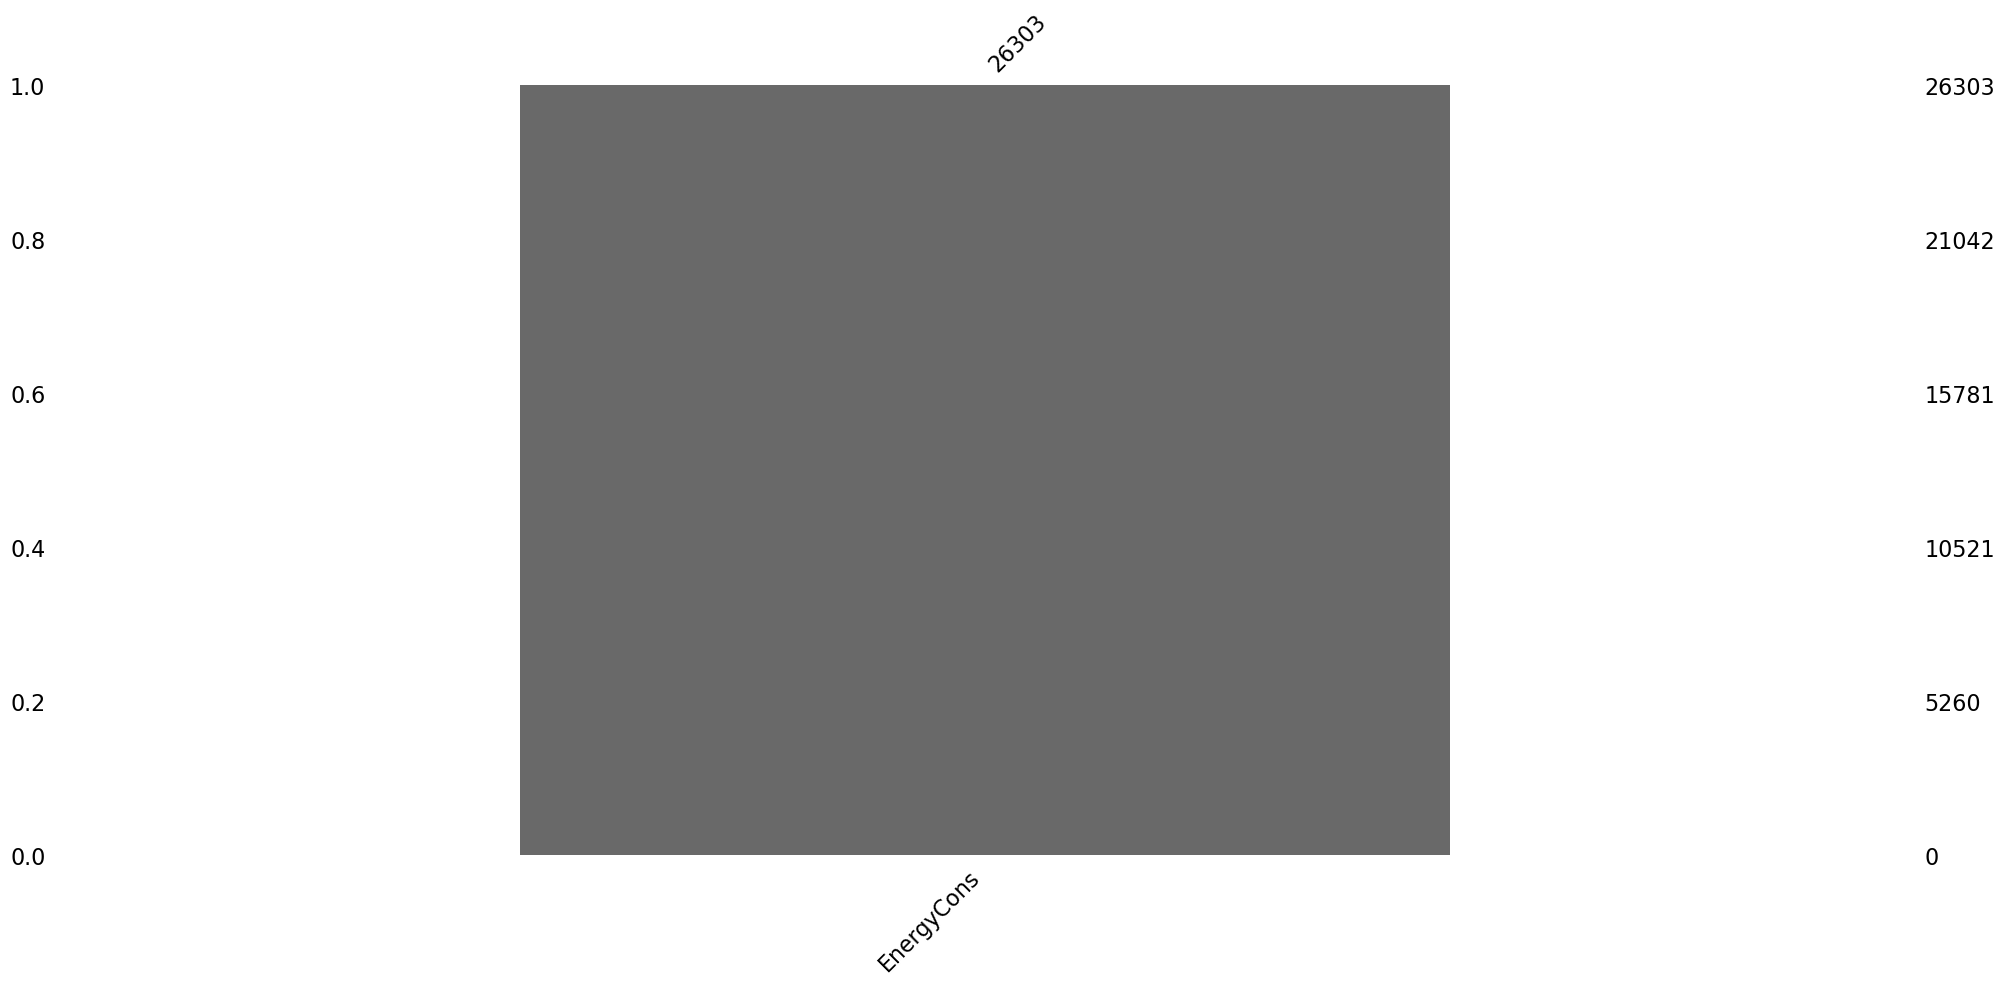

In [9]:
msno.bar(energy2016_2018)

It seems that everything is ready to develop an ANN model that:

**INPUT** : Meteorological data


**OUTPUT** : Building energy Consumption 

_______________________________________________________________

# Building the RNN model 

Before model development, it is of paramount importance to scale our features since they are of different nature. for instance, the pressrue of 10224 hpa and tempresture of 6.6 C are strongly different in terms of their numerical value. if scaling is not performed, the model will misunderstand the features and thinks Pressure is by far important just because of its high values!

**Standardizing our inputs**

In [10]:
# Import the required packages
from sklearn.preprocessing import StandardScaler #standardizes the data to a range in which the mean is equal to 0 and the standard deviation is 1. It assumes the data is normally distributed.

#Generate the scaler
sc1= StandardScaler()

X1 = sc1.fit_transform(meteo2016_2018_Updated)


## Performing model

In [11]:



import tensorflow as tf
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense


# Splitting  dataset into training (80%) and test data (20%)
X_train, X_test, y_train, y_test = train_test_split(X1, energy2016_2018, test_size=0.2, random_state=0, shuffle=False) 
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Scaling the data for RNN
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Reshape data for RNN (samples, time steps, features)
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Building the RNN model
Ghaziasgar_and_Pourfayaz_RNN = Sequential()
Ghaziasgar_and_Pourfayaz_RNN.add(SimpleRNN(units=50, activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
Ghaziasgar_and_Pourfayaz_RNN.add(Dense(1))

Ghaziasgar_and_Pourfayaz_RNN.compile(optimizer='adam', loss='mean_squared_error')

# Fitting the model to the training data
Ghaziasgar_and_Pourfayaz_RNN.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=32)

# Predicting on the test data
Predicted_Test_RNN_Scaled = Ghaziasgar_and_Pourfayaz_RNN.predict(X_test_scaled)
Predicted_Test_RNN = scaler_y.inverse_transform(Predicted_Test_RNN_Scaled)

# Testing the model's accuracy on the test data
print('R2 : ',r2_score(y_test, Predicted_Test_RNN))
print('MSE : ',mean_squared_error(y_test, Predicted_Test_RNN))


Epoch 1/100


2024-07-16 14:37:36.550265: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-16 14:37:36.550689: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/mohammad/miniconda3/envs/py310/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


658/658 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5162
Epoch 2/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1793
Epoch 3/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1631
Epoch 4/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1524
Epoch 5/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1498
Epoch 6/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1457
Epoch 7/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1429
Epoch 8/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1449
Epoch 9/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1442
Epoch 10/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1442
Epoch 11/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1426
Epoch 12/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1393
Epoch 13/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1381
Epoch 14/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1378
Epoch 15/100
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step -

As expected, the R² of this model is 0.85 for unseen data, and it achieves a commendable mean squared error (MSE) of 7.962

**This model can now be employed to predict building energy consumption with a high degree of accuracy.**

**Given the availability of actual meteorological data for the years 2019, 2020, 2021, 2022, and 2023, we input this data into our model, "Ghaziasgar_and_Pourfayaz_ANN." This allows us to obtain the building's energy consumption for the period from 2016 to 2023.**

## Predicting Building energy consumption in 2019

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Importing meteorological data of 2019 which is sorted to be consistent with our model
meteo2019 = pd.read_excel('/mnt/e/Education/M.Sc at UT/Projects/Energy consumption prediction/Iterative model/forGitHub/Datasets/meteorological data of 2019-2023/meteo2019.xlsx')
meteo2019 = meteo2019.set_index('Time')  # Setting the index as 'Time'

# Preparing meteo2019 to be fed to our model
sc1 = StandardScaler()
X2 = sc1.fit_transform(meteo2019)

# Assuming scaler_X is already fitted on the training data
X3 = scaler_X.transform(X2)

# Check the shape of X3 and reshape it if necessary
# Ensure the dimensions match what your RNN expects (e.g., (samples, timesteps, features))
# Assuming you have 1 timestep for each input sample
X3_reshaped = X3.reshape(X3.shape[0], 1, X3.shape[1])  # Reshape to (samples, timesteps, features)

# Using the developed model to predict
pred_2019_scaled = Ghaziasgar_and_Pourfayaz_RNN.predict(X3_reshaped)  # Using the reshaped data
pred_2019 = scaler_y.inverse_transform(pred_2019_scaled)

# Convert predictions to DataFrame
pred_2019_df = pd.DataFrame(pred_2019, columns=['EnergyCons'], index=meteo2019.index)


274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step


## Predicting Building energy consumption in 2020

In [17]:
#imorting meteorological data of 2020 which is sorted to be consistent with our model
meteo2020 = pd.read_excel('/mnt/e/Education/M.Sc at UT/Projects/Energy consumption prediction/Iterative model/forGitHub/Datasets/meteorological data of 2019-2023/meteo2020.xlsx')
meteo2020 = meteo2020.set_index('Time') #Setting the index as 'Time'

#Preparing meteo2020 to be fed by Our model
sc1= StandardScaler()
X4 = sc1.fit_transform(meteo2020)
X5 = scaler_X.fit_transform(X4)
X5_reshaped = X5.reshape(X5.shape[0], 1, X5.shape[1])  # Reshape to (samples, timesteps, features)


pred_2020_scaled = Ghaziasgar_and_Pourfayaz_RNN.predict(X5_reshaped) #Using the developed model
pred_2020 = scaler_y.inverse_transform(pred_2020_scaled)
#  Convert predictions to DataFrame
pred_2020_df = pd.DataFrame(pred_2020, columns=['EnergyCons'],index= meteo2020.index)

275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step


## Predicting Building energy consumption in 2021

In [18]:
#imorting meteorological data of 2021 which is sorted to be consistent with our model
meteo2021 = pd.read_excel('/mnt/e/Education/M.Sc at UT/Projects/Energy consumption prediction/Iterative model/forGitHub/Datasets/meteorological data of 2019-2023/meteo2021.xlsx')
meteo2021 = meteo2021.set_index('Time') #Setting the index as 'Time'

#Preparing meteo2021 to be fed by Our model
sc1= StandardScaler()
X6 = sc1.fit_transform(meteo2021)
X7 = scaler_X.fit_transform(X6)
X7_reshaped = X7.reshape(X7.shape[0], 1, X7.shape[1])  # Reshape to (samples, timesteps, features)


pred_2021_scaled = Ghaziasgar_and_Pourfayaz_RNN.predict(X7_reshaped) #Using the developed model
pred_2021 = scaler_y.inverse_transform(pred_2021_scaled)
#  Convert predictions to DataFrame
pred_2021_df = pd.DataFrame(pred_2021, columns=['EnergyCons'],index= meteo2021.index)

274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step


## Predicting Building energy consumption in 2022

In [19]:
#imorting meteorological data of 2022 which is sorted to be consistent with our model
meteo2022 = pd.read_excel('/mnt/e/Education/M.Sc at UT/Projects/Energy consumption prediction/Iterative model/forGitHub/Datasets/meteorological data of 2019-2023/meteo2022.xlsx')
meteo2022= meteo2022.set_index('Time') #Setting the index as 'Time'

#Preparing meteo2022 to be fed by Our model
sc1= StandardScaler()
X8 = sc1.fit_transform(meteo2022)
X9 = scaler_X.fit_transform(X8)
X9_reshaped = X9.reshape(X9.shape[0], 1, X9.shape[1])  # Reshape to (samples, timesteps, features)

pred_2022_scaled = Ghaziasgar_and_Pourfayaz_RNN.predict(X9_reshaped) #Using the developed model
pred_2022 = scaler_y.inverse_transform(pred_2022_scaled)
#  Convert predictions to DataFrame
pred_2022_df = pd.DataFrame(pred_2022, columns=['EnergyCons'],index= meteo2022.index)


274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step


## Predicting Building energy consumption in 2023

In [21]:
#imorting meteorological data of 2023 which is sorted to be consistent with our model
meteo2023 = pd.read_excel('/mnt/e/Education/M.Sc at UT/Projects/Energy consumption prediction/Iterative model/forGitHub/Datasets/meteorological data of 2019-2023/meteo2023.xlsx')
meteo2023= meteo2023.set_index('Time') #Setting the index as 'Time'

#Preparing meteo2023 to be fed by Our model
sc1= StandardScaler()
X10 = sc1.fit_transform(meteo2023)
X11 = scaler_X.fit_transform(X10)
X11_reshaped = X11.reshape(X11.shape[0], 1, X11.shape[1])  # Reshape to (samples, timesteps, features)

pred_2023_scaled = Ghaziasgar_and_Pourfayaz_RNN.predict(X11_reshaped) #Using the developed model
pred_2023 = scaler_y.inverse_transform(pred_2023_scaled)
#  Convert predictions to DataFrame

pred_2023_df = pd.DataFrame(pred_2023, columns=['EnergyCons'], index= meteo2023.index)


274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [22]:
#2019
# Define the filename and the sheet name
output_filename = '/mnt/e/Education/M.Sc at UT/Projects/Energy consumption prediction/Iterative model/forGitHub/Result/energyconsumption_2019_RNN.xlsx'
sheet_name = 'EnergyConsumption'

# Save the DataFrame to an Excel file
pred_2019_df.to_excel(output_filename, sheet_name=sheet_name, index=True)





#2020
# Define the filename and the sheet name
output_filename = '/mnt/e/Education/M.Sc at UT/Projects/Energy consumption prediction/Iterative model/forGitHub/Result/energyconsumption_2020_RNN.xlsx'
sheet_name = 'EnergyConsumption'

# Save the DataFrame to an Excel file
pred_2020_df.to_excel(output_filename, sheet_name=sheet_name, index=True)



#2021
# Define the filename and the sheet name
output_filename = '/mnt/e/Education/M.Sc at UT/Projects/Energy consumption prediction/Iterative model/forGitHub/Result/energyconsumption_2021_RNN.xlsx'
sheet_name = 'EnergyConsumption'

# Save the DataFrame to an Excel file
pred_2021_df.to_excel(output_filename, sheet_name=sheet_name, index=True)


#2022
# Define the filename and the sheet name
output_filename = '/mnt/e/Education/M.Sc at UT/Projects/Energy consumption prediction/Iterative model/forGitHub/Result/energyconsumption_2022_RNN.xlsx'
sheet_name = 'EnergyConsumption'

# Save the DataFrame to an Excel file
pred_2022_df.to_excel(output_filename, sheet_name=sheet_name, index=True)



#2023
# Define the filename and the sheet name
output_filename = '/mnt/e/Education/M.Sc at UT/Projects/Energy consumption prediction/Iterative model/forGitHub/Result/energyconsumption_2023_RNN.xlsx'
sheet_name = 'EnergyConsumption'

# Save the DataFrame to an Excel file
pred_2023_df.to_excel(output_filename, sheet_name=sheet_name, index=True)

# Consumption values (2016-2023)

In [105]:
# Here we store the hourly energy consumption of buildig from 2016 to 2023
Energy2016_2023 = pd.concat([energy2016_2018, pred_2019_df,pred_2020_df,pred_2021_df,pred_2022_df,pred_2023_df], axis=0) #Here we create a massive dataset for further analyzing
Energy2016_2023

,EnergyCons
Time,
2016-01-01 01:00:00.000,23.783228
2016-01-01 02:00:00.000,23.783228
2016-01-01 03:00:00.000,23.783228
2016-01-01 04:00:00.000,23.783228
2016-01-01 05:00:00.000,23.783228
...,...
2023-12-31 20:00:43.770,20.682016
2023-12-31 21:00:43.775,20.415318
2023-12-31 22:00:43.780,20.389372


**now that we have created a dataset that has the hourly energy consumption data of building from 2016 to 2023, we can further analyze the trend and discuss the future.**

## Saving the dataset into an excel file as a results

In [107]:
# Define the filename and the sheet name
output_filename = '/mnt/e/Education/M.Sc at UT/Projects/Energy consumption prediction/Iterative model/forGitHub/Result/energyconsumption_2016_2023.xlsx'
sheet_name = 'EnergyConsumption'

# Save the DataFrame to an Excel file
Energy2016_2023.to_excel(output_filename, sheet_name=sheet_name, index=True)

print(f"Predictions saved to {output_filename}")

Predictions saved to /mnt/e/Education/M.Sc at UT/Projects/Energy consumption prediction/Iterative model/forGitHub/Result/energyconsumption_2016_2023.xlsx
